<a href="https://colab.research.google.com/github/htapiagroup/oscilaciones-de-masas-acopladas-por-resortes-ErickHafid/blob/master/Masas_acopladas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dos masas acopladas por tres resortes

Es prosible analizar mediante la mecánica de Hamilton este sistema, obteniendo como la función:
$$
H = \frac{1}{2m_1}p_{1}^{2} +\frac{1}{2m_2}p_{2}^{2} + \frac{1}{2}k_{1}x_{1}^{2} + \frac{1}{2}k_{3}x_{2}^{2} + \frac{1}{2}k_{2}(x_{2}-x_{1})^2
$$
de donde mediante las ecuaciones de Hamilton se pueden encontrar los valores de $\dot{p}_i$ y  $\dot{q}_i$, entonces:

\begin{align*}
    \dot{p}_1 =& -\frac{\partial H}{\partial x_1} = -k_{1}x_{1} + k_{2}(x_{2}-x_{1})\\
    \dot{p}_2 =& -\frac{\partial H}{\partial x_2} = -k_{3}x_{2} - k_{2}(x_{2}-x_{1})\\
    \dot{q}_1 =& \frac{\partial H}{\partial p_1} = \frac{1}{m_1}p_{1} = \dot{x}_1\\
    \dot{q}_2 =& \frac{\partial H}{\partial p_2} = \frac{1}{m_2}p_{2} = \dot{x}_2   ;
\end{align*}
Entonces, utilizando el método de Euler se pueden calcular las ecuaciones de movimiento del sistema de masas.

## Código

In [0]:
# Se importan las librerías útiles
import numpy as np
import matplotlib.pyplot as plt
import time

In [0]:
# Definición de parámetros
## Constantes de restitución de los resortes
k1 = 1.
k2 = 1.
k3 = 1.

## Masas del sistema
m1 = 1.
m2 = 1.

In [0]:
# Operador de derivadas para un vector
def Q_Dot(y):
        
    x1 = y[0]
    x2 = y[1]
    p1 = y[2]
    p2 = y[3]

    x1_dot = p1 / m1
    x2_dot = p2 / m2
    p1_dot = - k1*x1 + k2*(x2 - x1)
    p2_dot = - k3*x2 - k2*(x2 - x1)

    return np.asarray([x1_dot, x2_dot, p1_dot, p2_dot])

In [0]:
# Operación para calcular el paso m = n+1
def paso_Euler(f, t_n, y_n, dt):
    y_dot = f(t_n, y_n)
    y_m = y_n + dt*y_dot
    
    return y_m

In [0]:
# Trayectoria del desplazamiento
def Integrador(f, t, y_0, dt):
    
    t_0, t_f = t
    n = int((t_f - t_0)/dt)
    d = len(y_0)
    y_tray = np.zeros(((n+1), d))
    t = np.linspace(t_0, t_f, n+1)
    y_tray[0, :] = y_0
    
    for i in range(n):
        y_tray[i+1, :] = paso_Euler(f, t[i], y_tray[i,:], dt)

    return t, y_tray

In [0]:
# Operador posición en el tiempo
def Q_Dot_t(t, y):
    return Q_Dot(y)

### Resultados
Utilizando todos los parámetros iguales a la unidad.

Text(0, 0.5, 'Posición')

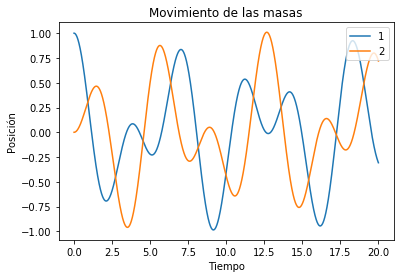

In [7]:
# Condiciones iniciales
## Masa 1: x1 = 1.0 , p1 = 0.0
## Masa 2: x2 = 0.0 , p2 = 0.0 
t, Q_tray = Integrador(Q_Dot_t, [0,20], [1.,0.,0.,0.], 0.001)

# Gráficas
plt.plot(t,Q_tray[:,0]);
plt.plot(t,Q_tray[:,1]);
plt.title('Movimiento de las masas')
plt.legend(
    ('1', '2'),
    prop = {'size':10},
    loc = 'upper right'
    )
plt.xlabel('Tiempo')
plt.ylabel('Posición')


Text(0, 0.5, 'Posición')

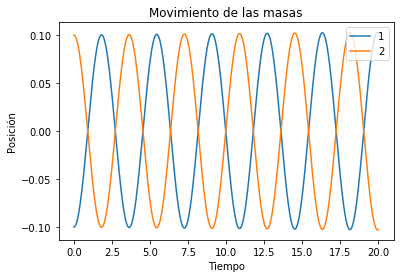

In [8]:
# Condiciones iniciales
## Masa 1: x1 = -0.1 , p1 = 0.0
## Masa 2: x2 = +0.1 , p2 = 0.0 
t, Q_tray = Integrador(Q_Dot_t,[0,20],[-0.1,0.1,0.,0.],0.001)

# Gráficas
plt.plot(t,Q_tray[:,0]);
plt.plot(t,Q_tray[:,1]);
plt.title('Movimiento de las masas')
plt.legend(
    ('1', '2'),
    prop = {'size':10},
    loc = 'upper right'
    )
plt.xlabel('Tiempo')
plt.ylabel('Posición')

### Resultados
Utilizando masas distintas $m_1 = 1.$ y $m_2 = 2.$ con constantes de restitución:
$$
\begin{align*}
    k_1 = 1 \\
    k_2 = 2 \\
    k_3 = 3
\end{align*}
$$

In [0]:
# Definición de nuevos parámetros
## Constantes de restitución de los resortes
k1 = 1.
k2 = 2.
k3 = 3.

## Masas del sistema
m1 = 1.
m2 = 2.

Text(0, 0.5, 'Posición')

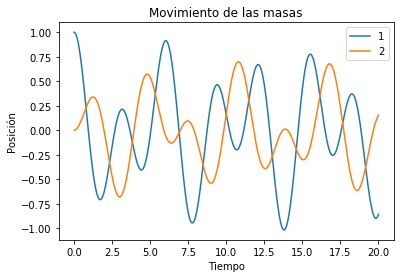

In [10]:
# Condiciones iniciales
## Masa 1: x1 = 1.0 , p1 = 0.0
## Masa 2: x2 = 0.0 , p2 = 0.0 
t, Q_tray = Integrador(Q_Dot_t, [0,20], [1.,0.,0.,0.], 0.001)

# Gráficas
plt.plot(t,Q_tray[:,0]);
plt.plot(t,Q_tray[:,1]);
plt.title('Movimiento de las masas')
plt.legend(
    ('1', '2'),
    prop = {'size':10},
    loc = 'upper right'
    )
plt.xlabel('Tiempo')
plt.ylabel('Posición')

Text(0, 0.5, 'Posición')

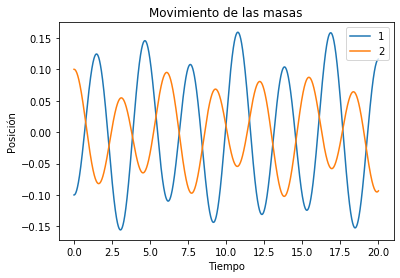

In [11]:
# Condiciones iniciales
## Masa 1: x1 = -0.1 , p1 = 0.0
## Masa 2: x2 = +0.1 , p2 = 0.0 
t, Q_tray = Integrador(Q_Dot_t,[0,20],[-0.1,0.1,0.,0.],0.001)

# Gráficas
plt.plot(t,Q_tray[:,0]);
plt.plot(t,Q_tray[:,1]);
plt.title('Movimiento de las masas')
plt.legend(
    ('1', '2'),
    prop = {'size':10},
    loc = 'upper right'
    )
plt.xlabel('Tiempo')
plt.ylabel('Posición')

### Energía del sistema

In [0]:
# Función energía
def Energia(y,t):
    
    x1 = y[0]
    x2 = y[1]
    p1 = y[2]
    p2 = y[3]
  
    tau = []
    T = []
    V = []
    E = []

    for i in range (t):
        tau.append(i)
        T.append(p1/m1 + p2/m2)
        V.append((1/2)*k1*x1**2 + (1/2)*(x2-x1)**2 + (1/2)*k3*x2**2)
        e = T[i]+V[i] 
        E.append(e) 
    
    return E

In [13]:
# Energía para el sistema 1
y = [1.,0.,0.,0.]
Energia(y, 10)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [14]:
# Energía para el sistema 2
y = [-0.1,0.1,0.,0.]
Energia(y, 10)

[0.04000000000000001,
 0.04000000000000001,
 0.04000000000000001,
 0.04000000000000001,
 0.04000000000000001,
 0.04000000000000001,
 0.04000000000000001,
 0.04000000000000001,
 0.04000000000000001,
 0.04000000000000001]

Se observa que no importa cuánto avance el tiempo, la energía se conserva en el sistema, entre otras cosas por la idelización del arreglo donde no existe ningún tipo de rozamiento. 

# N masas acopladas por N+1 resortes

Después de analizar el sistema se plantea la siguiente ecuación de Hamilton:

$$
   H = \sum_{j=1}^{N} \frac{1}{2m_j}p_{j}^2 + \sum_{j=0}^{N}\frac{1}{2}k(x_{j+1}-x_j)^2
$$
Esto es, considerando que en los extremos $x_0$ y  $x_{N+1}$ no existe movimiento, entonces, las ecuaciones de Hamilton proporcionan la información:
$$
\begin{align*}
  \dot{x}_j &= \frac{1}{m_j}p_j \\
  \dot{p}_j &= -k(x_{j+1}-2x_{j}+x_{j-1}) 
\end{align*}
$$
Pero debe recordarse que las sumas sólo están definidas para $x = x_{1}, x_{2}, ... , x_{N}$ y $x=0$ en cualquier otro caso.

## Código

In [0]:
# Definición de parámetros
## Constante de restitución de los resortes
k = 1.

## Masas del sistema
m = 1.

In [0]:
# Prepración del vector de coordenadas y momentos
def Vector(x, N):
    A = x
    B = np.insert(A,0,0)
    C = np.insert(B,N+1,0)
    D = np.insert(C,N+2,0)
    y = np.insert(D,2*N+3,0)

    return y

In [0]:
# Derivadas de un vector de posiciones y momentos
def R_Dot(y): 
 
    y_Dot = np.zeros(2*N+4)
    
    for i in range(1,N+1):
        y_Dot[i] = y[N+2+i] / m
        y_Dot[N+2+i] = k*(y[i+1] - 2*y[i] + y[i-1])

    return y_Dot

In [0]:
# Operación para calcular el paso m = n+1
def paso_Euler(f, t_n, y_n, dt):
    y_dot = f(t_n, y_n)
    y_m = y_n + dt*y_dot
    
    return y_m

In [0]:
# Trayectoria del desplazamiento
def Integrador(f, t, y_0, dt):
    t_0, t_f = t

    n = int((t_f - t_0)/dt)
    d = 2*N+4
    y_tray = np.zeros((n+1, d))
    t = np.linspace(t_0, t_f, n+1)
    y_tray[0, :] = y_0
    
    for i in range(n):
        y_tray[i+1, :] = paso_Euler(f, t[i], y_tray[i,:], dt)

    return t, y_tray

In [0]:
def R_Dot_t(t, y):
    return R_Dot(y)

In [0]:
def Grafica(t, r_tray, N):
    n = 1
    while n < N+1:
        plt.plot(t, r_tray[:,n], label = n)
        n = n + 1

    plt.title('Movimiento de las masas')
    plt.legend(
        prop = {'size':10},
        loc = 'upper right'
        )
    plt.xlabel('Tiempo')
    plt.ylabel('Posición')

    return plt.show()

## Resultados

 Utilizando los parámetros iguales a la unidad

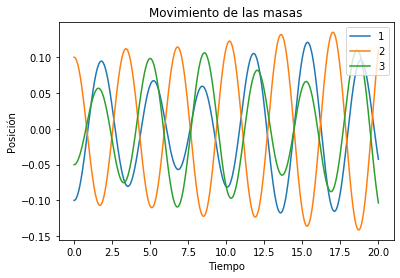

In [22]:
# Número de masas
N = 3 
y0 = [-0.1,0.1,-0.05,0.,0.,0.]
y = Vector(y0, N)
t, r_tray = Integrador(R_Dot_t, [0,20], y, 0.01)
Grafica(t, r_tray, N)

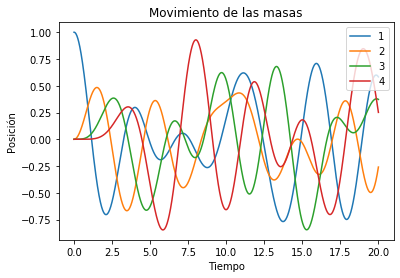

In [23]:
# Número de masas
N = 4
# Condiciones iniciales
y0 = [1.,0.,0.,0.,0.,0.,0.,0.] 
y = Vector(y0, N)
t, r_tray = Integrador(R_Dot_t, [0,20], y, 0.01)
Grafica(t, r_tray, N)

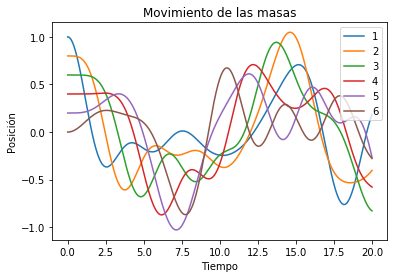

In [24]:
# Número de masas
N = 6
# Condiciones iniciales
y0 = [1.0, 0.8, 0.6, 0.4, 0.2, 0., 0., 0., 0., 0., 0., 0.]
y = Vector(y0, N)
t , r_tray = Integrador(R_Dot_t, [0,20], y, 0.01)
Grafica(t, r_tray, N)